In [157]:
%pylab inline
import os
import gc
import scipy
import smatch
import treecorr
import numpy as np
import catutil as utilities
import astropy.io.fits as pyfits

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd wrkDir/FPFS2/sim3/

/lustre/work/xiangchong.li/work/FPFS2/sim3


In [12]:
hnmList=['BEST','MEDIAN','WORST']

magLim=26.4
raMin=149.8;raMax=150.7
decMin=1.8;decMax=2.7

def calcDistanceAngle(a1, a2, d1, d2):
    a1_f64 = np.array(a1, dtype = np.float64)
    d1_f64 = np.array(d1, dtype = np.float64)
    a2_f64 = np.array(a2, dtype = np.float64)
    d2_f64 = np.array(d2, dtype = np.float64)
    return np.arccos(np.cos(d1_f64)*np.cos(d2_f64)*np.cos(a1_f64-a2_f64)+np.sin(d1_f64)*np.sin(d2_f64))


def closeMatch(ra,dec):
    nside=4096 # healpix nside
    maxmatch=1 # return closest match
    radius=5/3600.
    cat=smatch.Catalog(ra, dec, radius, nside=nside)
    # ra,dec,radius in degrees
    cat.match_self(maxmatch=maxmatch)
    raA=ra[cat.matches['i1']]/180.*np.pi
    raB=ra[cat.matches['i2']]/180.*np.pi
    decA=dec[cat.matches['i1']]/180.*np.pi
    decB=dec[cat.matches['i2']]/180.*np.pi
    dis=calcDistanceAngle(raA,raB,decA,decB)*180./np.pi*3600.
    return dis

In [21]:
del catAllC,catAll
gc.collect()

2309

In [22]:
catAllC=[]
afname=os.path.join(os.environ["homeWrk"],'COSMOS/Leauthaud2007/acs_clean.fits')
alexCat=pyfits.getdata(afname)
msk=(alexCat['MU_CLASS']==1)&(alexCat['NEARSTAR']==1)&\
    (alexCat['MASKED']==1)&(alexCat['CLEAN']==1)
msk=msk&(alexCat['mag_auto']<magLim)
msk=msk&(alexCat['ALPHA_J2000']>raMin)&(alexCat['ALPHA_J2000']<raMax)
msk=msk&(alexCat['DELTA_J2000']>decMin)&(alexCat['DELTA_J2000']<decMax)
data=alexCat[msk]
catAllC.append(data)
del alexCat,data,msk
gc.collect()

lfname=os.path.join(os.environ["homeWrk"],'COSMOS/Laigle2015/COSMOS2015_Laigle+_v1.1.fits')
laiCat=pyfits.getdata(lfname)
msk=(laiCat['ALPHA_J2000']>raMin)&(laiCat['ALPHA_J2000']<raMax)
msk=msk&(laiCat['DELTA_J2000']>decMin)&(laiCat['DELTA_J2000']<decMax)
msk=msk&(laiCat['ip_MAG_AUTO']<magLim)
data=laiCat[msk]
catAllC.append(data)
del laiCat,data,msk
gc.collect()

'\ncatAll=[]\nfor nm in hnmList:\n    hfname=os.path.join(os.environ["homeWrk"],        \'galSim-HSC/database/s19-COSMOS/origin/COSMOS_WIDE_DEPTH_%s.fits\' %nm)\n    hCat=pyfits.getdata(hfname)\n    ra,dec=utilities.get_radec(hCat)\n    msk=(utilities.get_imag(hCat)<magLim)\n    msk=msk&(ra>raMin)&(ra<raMax)\n    msk=msk&(dec>decMin)&(dec<decMax)\n    data=hCat[msk]\n    catAll.append(data)\n    del msk,data,hCat\n    gc.collect()\n'

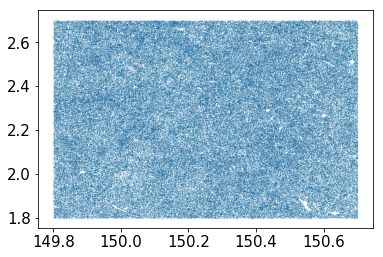

In [5]:
plt.close()
plt.scatter(catAllC[0]['ALPHA_J2000'],catAllC[0]['DELTA_J2000'],\
            s=0.01,label='Lea2007',alpha=0.4)
ii=0
for nm in ['BEST','MEDIAN','WORST']:
    ra,dec=utilities.get_radec(catAll[ii])
    #plt.scatter(ra,dec,s=0.01,label=nm,alpha=0.4)
    ii+=1
    del ra,dec
    gc.collect()
    break
#plt.legend()

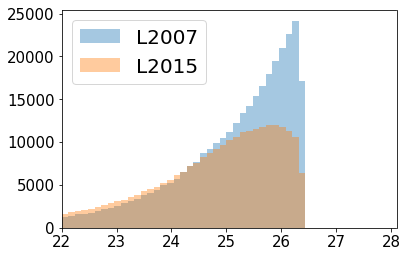

In [152]:
plt.close()
plt.hist(catAllC[0]['mag_auto'],label='L2007',\
     alpha=0.4,range=(22.,28.),bins=50)

plt.hist(catAllC[1]['ip_MAG_AUTO'],label='L2015',\
     alpha=0.4,range=(22.,28.),bins=50)

ii=0
plt.xlim(22.,28.1)
plt.legend()

(0, 25000.0)

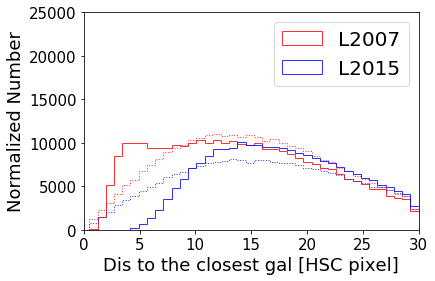

In [153]:
disA=closeMatch(catAllC[0]['ALPHA_J2000'],catAllC[0]['DELTA_J2000'])
plt.hist(disA/0.168,alpha=0.8,range=(0.5,30),bins=40,\
         color='red',label='L2007',histtype='step')

raRan=raMin+(raMax-raMin)*np.random.rand(len(catAllC[0]))
decRan=decMin+(decMax-decMin)*np.random.rand(len(catAllC[0]))
dis_tmp=closeMatch(raRan,decRan)
plt.hist(dis_tmp/0.168,alpha=0.8,range=(0.5,30),bins=40,\
         color='red',ls=':',histtype='step')

disL=closeMatch(catAllC[1]['ALPHA_J2000'],catAllC[1]['DELTA_J2000'])
plt.hist(disL/0.168,alpha=0.8,range=(0.5,30),bins=40,\
         color='blue',label='L2015',histtype='step')

raRan=raMin+(raMax-raMin)*np.random.rand(len(catAllC[1]))
decRan=decMin+(decMax-decMin)*np.random.rand(len(catAllC[1]))
dis_tmp=closeMatch(raRan,decRan)
plt.hist(dis_tmp/0.168,alpha=0.8,range=(0.5,30),bins=40,\
         color='blue',ls=':',histtype='step')

del dis_tmp,raRan,decRan
gc.collect()
    
plt.legend()
plt.xlabel('Dis to the closest gal [HSC pixel]')
plt.ylabel('Normalized Number')
plt.xlim(0,30)
plt.ylim(0,2.5e4)

(0, 15000.0)

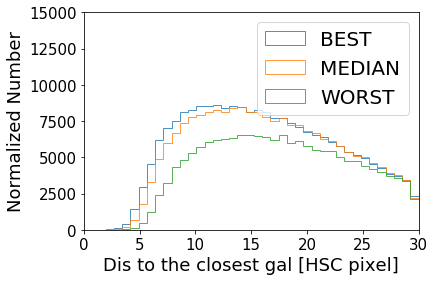

In [156]:
catAll=[]
for nm in hnmList:
    hfname=os.path.join(os.environ["homeWrk"],\
        'galSim-HSC/database/s19-COSMOS/origin/COSMOS_WIDE_DEPTH_%s.fits' %nm)
    hCat=pyfits.getdata(hfname)
    ra,dec=utilities.get_radec(hCat)
    msk=(utilities.get_imag(hCat)<magLim)
    msk=msk&(ra>raMin)&(ra<raMax)
    msk=msk&(dec>decMin)&(dec<decMax)
    data=hCat[msk]
    catAll.append(data)
    del msk,data,hCat
    gc.collect()
    
for ii in range(3):
    data=catAll[ii]
    nm=hnmList[ii]
    ra,dec=utilities.get_radec(data)
    dis_tmp=closeMatch(ra,dec)
    plt.hist(dis_tmp/0.168,alpha=0.8,range=(0.5,30),bins=40,label=nm,histtype='step')
    del ra,dec,data
    gc.collect()
del dis_tmp
gc.collect()
plt.legend()
plt.xlabel('Dis to the closest gal [HSC pixel]')
plt.ylabel('Normalized Number')
plt.xlim(0,30)
plt.ylim(0,1.5e4)

In [ ]:
nn=treecorr.NNCorrelation(nbins=20,min_sep=0.1/3600.,max_sep=5./3600.,\
                          sep_units='deg',bin_type='Log')
cat1  =   treecorr.Catalog(ra_units='deg',dec_units='deg',
                    ra=catAllC[0]['ALPHA_J2000'],dec=catAllC[0]['DELTA_J2000']) 
nn.process(cat1)
plt.plot(nn.rnom*3600./0.168,np.log10(nn.npairs))


rr=treecorr.NNCorrelation(nbins=20,min_sep=0.1/3600.,max_sep=5./3600.,\
                          sep_units='deg',bin_type='Log')
raRan=raMin+(raMax-raMin)*np.random.rand(len(catAllC[0]))
decRan=decMin+(decMax-decMin)*np.random.rand(len(catAllC[0]))
catR  =   treecorr.Catalog(ra_units='deg',dec_units='deg',
                    ra=raRan,dec=decRan) 
rr.process(catR)
plt.plot(rr.rnom*3600./0.168,np.log10(rr.npairs))


nr=treecorr.NNCorrelation(nbins=20,min_sep=0.1/3600.,max_sep=5./3600.,\
                          sep_units='deg',bin_type='Log')
nr.process_cross(cat1,catR)
plt.plot(nr.rnom*3600./0.168,np.log10(nr.npairs/2.))

Text(0, 0.5, '$w(\\theta)$')

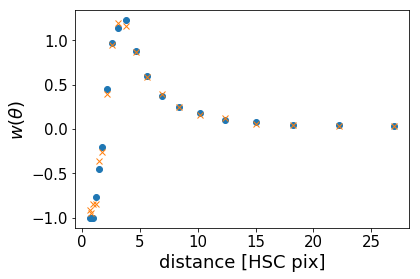

In [160]:
w1=nn.npairs/rr.npairs-1
plt.plot(rr.rnom*3600./0.168,w1,'o')

w2=(nn.npairs-nr.npairs)/rr.npairs+1
plt.plot(rr.rnom*3600./0.168,w2,'x')

plt.xlabel('distance [HSC pix]')
plt.ylabel(r'$w(\theta)$')

/lustre/work/xiangchong.li/ana/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/lustre/work/xiangchong.li/ana/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


(-2, 0.5)

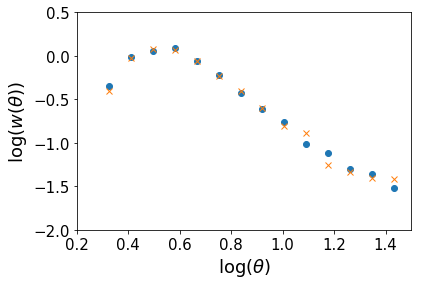

In [172]:
w1=nn.npairs/rr.npairs-1
plt.plot(np.log10(rr.rnom*3600./0.168),np.log10(w1),'o')

w2=(nn.npairs-nr.npairs)/rr.npairs+1
plt.plot(np.log10(rr.rnom*3600./0.168),np.log10(w2),'x')

plt.xlabel(r'log($\theta$)')
plt.ylabel(r'log($w(\theta)$)')
plt.xlim(0.2,1.5)
plt.ylim(-2,0.5)

In [174]:
10**0.6*0.168

0.6688200465298754